In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
from scipy import stats
import os

In [2]:
df=pd.read_csv(r"D:\ishan\Machine Learning DOC\Dataset\TATASTEEL.NS (1).csv")

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,11.172855,11.214964,11.035300,11.186892,2.568285,10242229.0
1,1996-01-02,11.172855,11.214964,10.951082,10.979155,2.520592,16954313.0
2,1996-01-03,10.979155,11.229000,10.951082,10.981962,2.521237,13514114.0
3,1996-01-04,10.807913,10.807913,10.386825,10.633863,2.441320,34785820.0
4,1996-01-05,10.504730,10.555260,10.316644,10.423319,2.392984,30138033.0
...,...,...,...,...,...,...,...
6866,2023-04-11,105.550003,107.849998,105.099998,107.550003,107.550003,49304956.0
6867,2023-04-12,108.199997,108.400002,106.949997,107.599998,107.599998,27349538.0
6868,2023-04-13,107.500000,108.150002,105.900002,107.500000,107.500000,34880922.0
6869,2023-04-17,107.599998,108.300003,106.750000,107.150002,107.150002,24642162.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6871 entries, 0 to 6870
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6871 non-null   object 
 1   Open       6864 non-null   float64
 2   High       6864 non-null   float64
 3   Low        6864 non-null   float64
 4   Close      6864 non-null   float64
 5   Adj Close  6864 non-null   float64
 6   Volume     6864 non-null   float64
dtypes: float64(6), object(1)
memory usage: 375.9+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6.864000e+03
mean,37.789490,38.398499,37.098333,37.718267,15.757361,6.982651e+07
std,29.604842,30.016965,29.104956,29.542239,19.703162,5.831510e+07
min,3.705570,3.910499,3.705570,3.775751,0.902283,0.000000e+00
25%,10.554558,10.702640,10.366472,10.504730,2.432781,3.292896e+07
50%,34.616764,35.114075,33.954185,34.530851,12.302627,5.383640e+07
75%,50.849415,51.657379,50.037729,50.813896,18.808940,8.758241e+07
max,161.486557,161.486557,161.486557,161.486557,123.550003,6.428460e+08


In [6]:
df.isnull().sum()

Date         0
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum().sum()

42

In [9]:
df.shape

(6871, 7)

In [10]:
df.select_dtypes(include='object').nunique()

Date    6871
dtype: int64

In [11]:
df.select_dtypes(include='float64').nunique()

Open         4908
High         5480
Low          5495
Close        5832
Adj Close    6372
Volume       6745
dtype: int64

In [12]:
df.drop(columns=['High','Low','Adj Close','Volume'],inplace=True)

In [13]:
df

,Date,Open,Close
0,1996-01-01,11.172855,11.186892
1,1996-01-02,11.172855,10.979155
2,1996-01-03,10.979155,10.981962
3,1996-01-04,10.807913,10.633863
4,1996-01-05,10.504730,10.423319
...,...,...,...
6866,2023-04-11,105.550003,107.550003
6867,2023-04-12,108.199997,107.599998
6868,2023-04-13,107.500000,107.500000
6869,2023-04-17,107.599998,107.150002


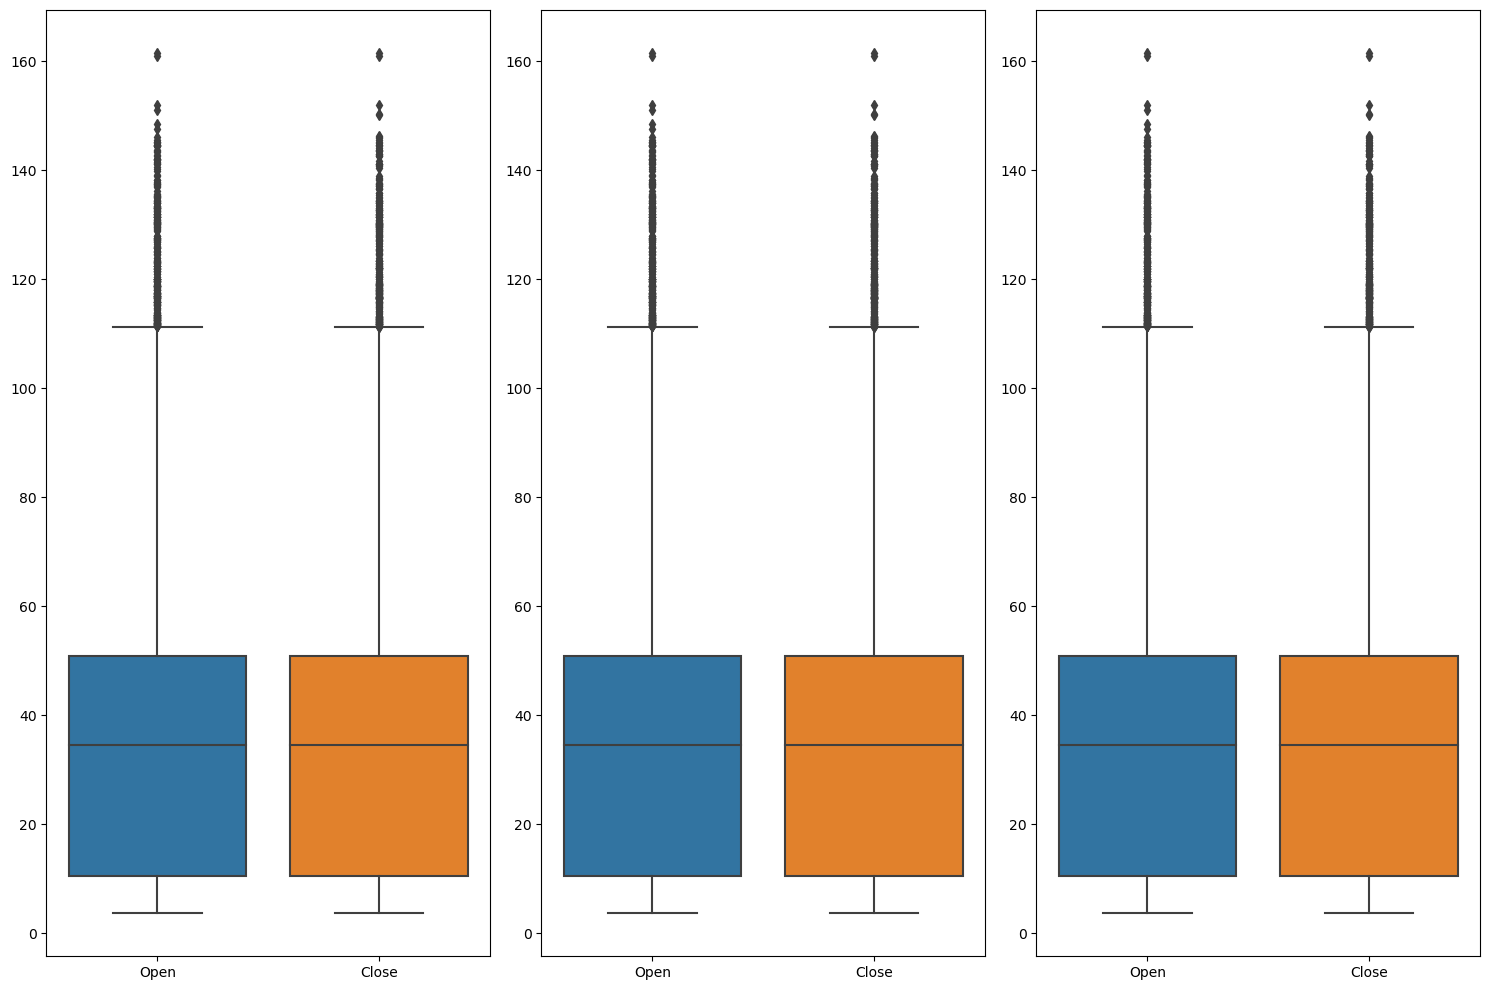

In [14]:
num_var=['Date','Open','Close']

#create figures with subplot
fig, axs=plt.subplots(nrows=1,ncols=3,figsize=(15,10))
axs=axs.flatten()

for i,var in enumerate (num_var):
    sns.boxplot(data=df,ax=axs[i])
    

fig.tight_layout()
plt.show()

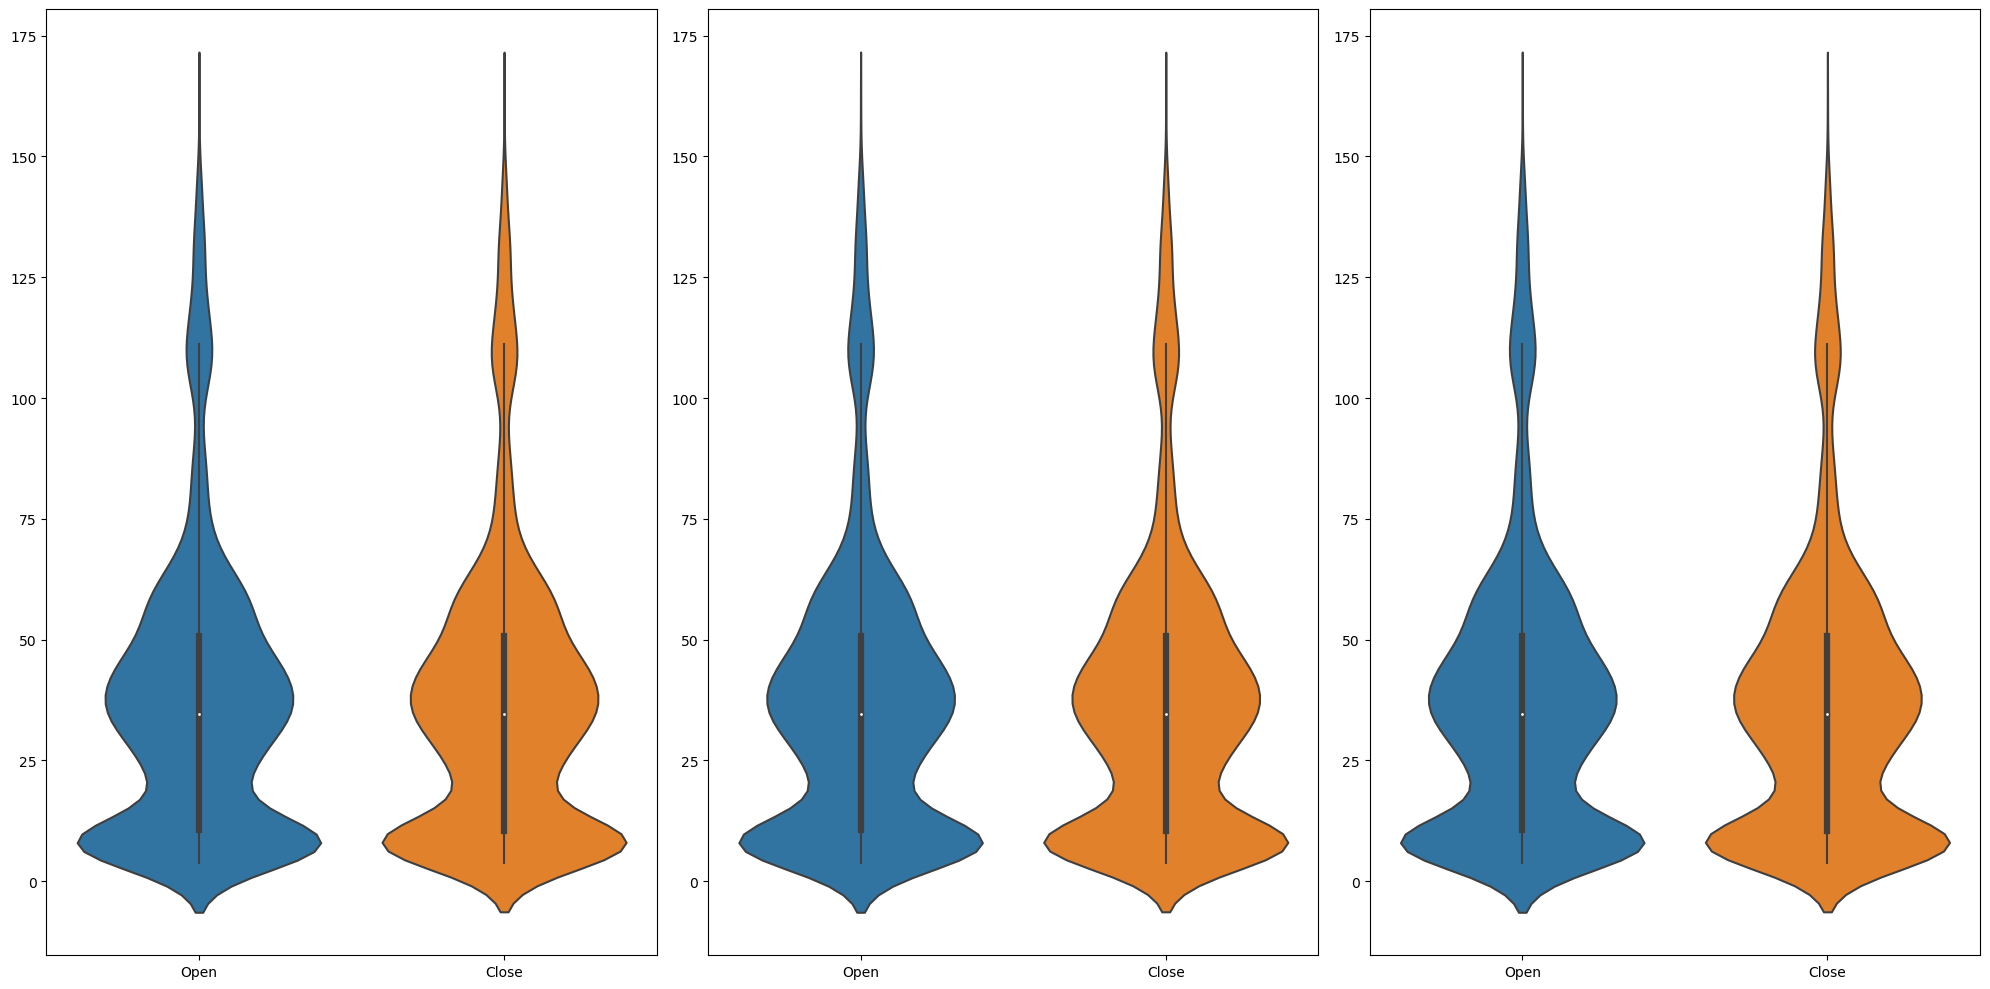

In [15]:
num_var=['Date','Open','Close']

#create figures with subplot
fig, axs=plt.subplots(nrows=1,ncols=3,figsize=(20,10))
axs=axs.flatten()

for i,var in enumerate (num_var):
    sns.violinplot(data=df,ax=axs[i])
    
    
#remove the 5th subplot
#fig.delaxes(axs[5])


fig.tight_layout()
plt.show()

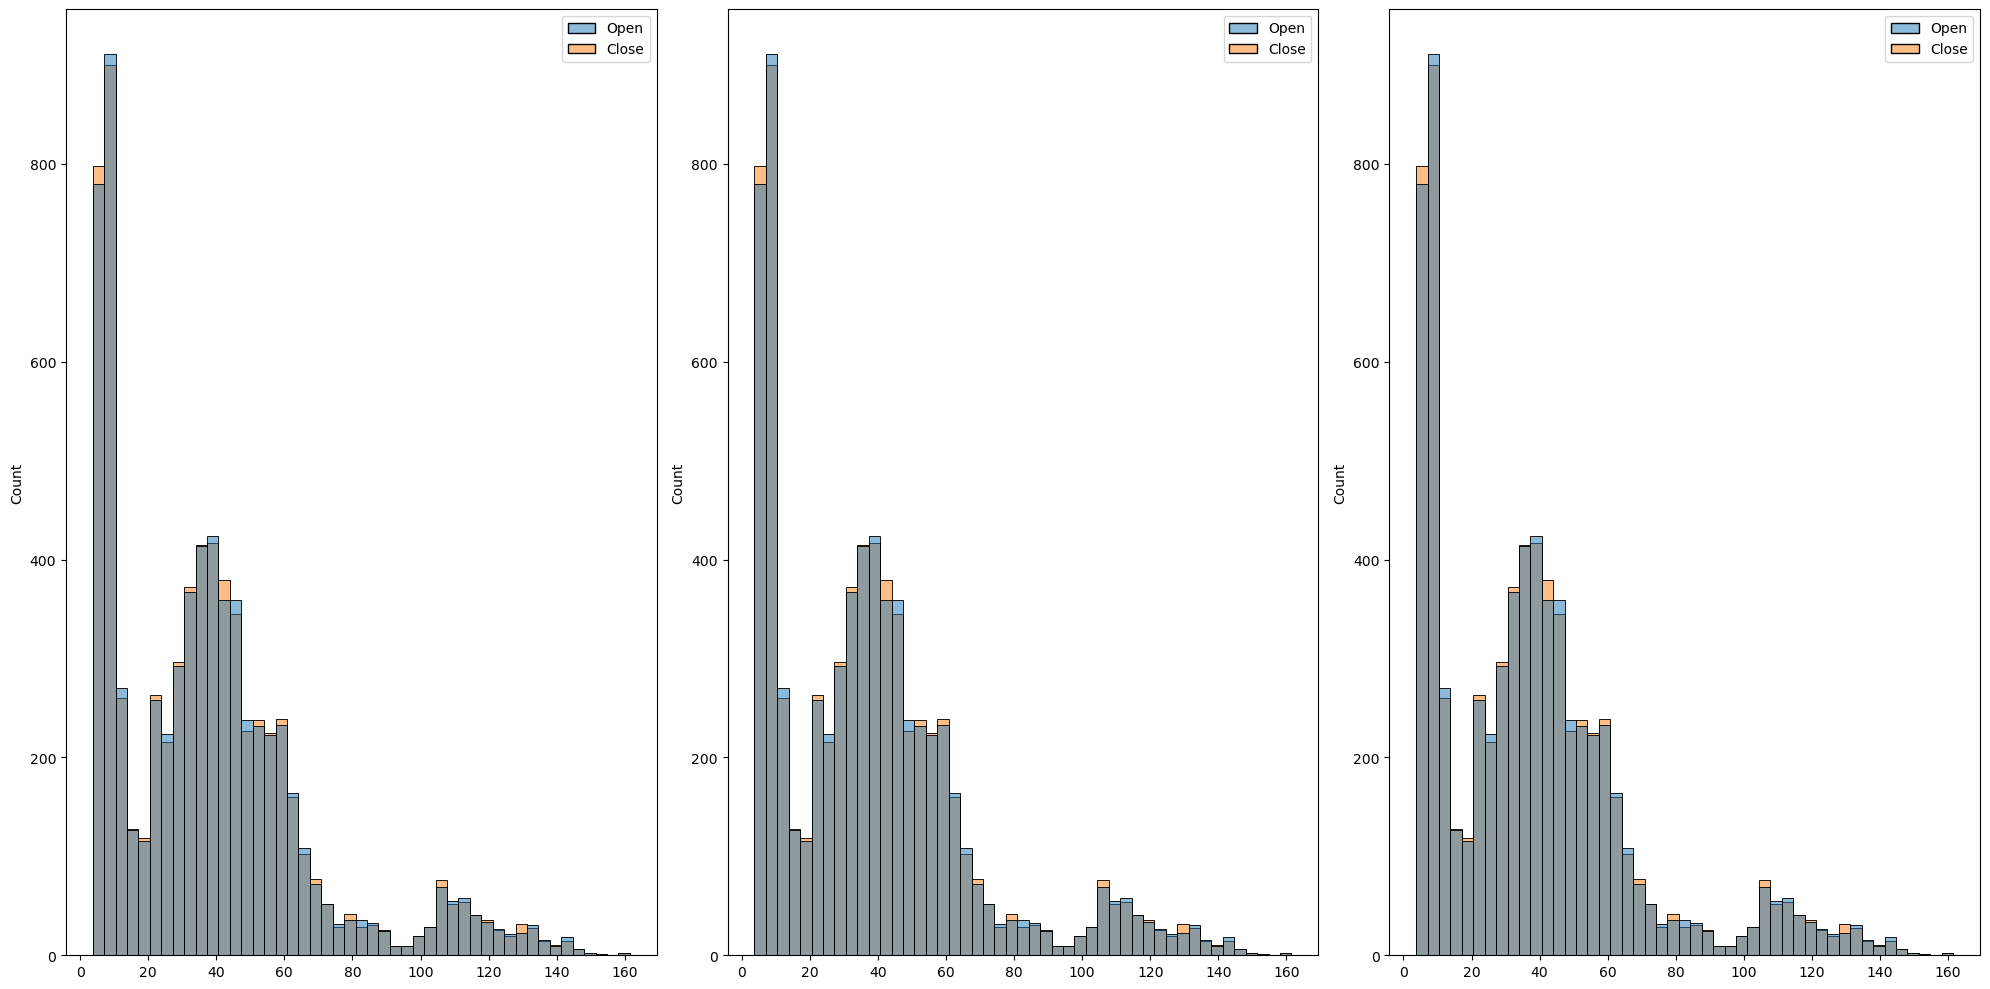

In [16]:
num_var=['Date','Open','Close']

#create figures with subplot
fig, axs=plt.subplots(nrows=1,ncols=3,figsize=(20,10))
axs=axs.flatten()

for i,var in enumerate (num_var):
    sns.histplot(data=df,ax=axs[i])
    

fig.tight_layout()
plt.show()

In [17]:
#Loop over each column in the Dataframe where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    #print the columns name and the unique values
    print(f"{col}:{df[col].unique()}")

Date:['1996-01-01' '1996-01-02' '1996-01-03' ... '2023-04-13' '2023-04-17'
 '2023-04-18']


In [18]:
df['Year']=df['Date'].str[0:4]

In [19]:
df

,Date,Open,Close,Year
0,1996-01-01,11.172855,11.186892,1996
1,1996-01-02,11.172855,10.979155,1996
2,1996-01-03,10.979155,10.981962,1996
3,1996-01-04,10.807913,10.633863,1996
4,1996-01-05,10.504730,10.423319,1996
...,...,...,...,...
6866,2023-04-11,105.550003,107.550003,2023
6867,2023-04-12,108.199997,107.599998,2023
6868,2023-04-13,107.500000,107.500000,2023
6869,2023-04-17,107.599998,107.150002,2023


In [20]:
df['Month']=df['Date'].str[5:7]

In [21]:
df

,Date,Open,Close,Year,Month
0,1996-01-01,11.172855,11.186892,1996,01
1,1996-01-02,11.172855,10.979155,1996,01
2,1996-01-03,10.979155,10.981962,1996,01
3,1996-01-04,10.807913,10.633863,1996,01
4,1996-01-05,10.504730,10.423319,1996,01
...,...,...,...,...,...
6866,2023-04-11,105.550003,107.550003,2023,04
6867,2023-04-12,108.199997,107.599998,2023,04
6868,2023-04-13,107.500000,107.500000,2023,04
6869,2023-04-17,107.599998,107.150002,2023,04


In [22]:
df['date']=df['Date'].str[8:]

In [23]:
df

,Date,Open,Close,Year,Month,date
0,1996-01-01,11.172855,11.186892,1996,01,01
1,1996-01-02,11.172855,10.979155,1996,01,02
2,1996-01-03,10.979155,10.981962,1996,01,03
3,1996-01-04,10.807913,10.633863,1996,01,04
4,1996-01-05,10.504730,10.423319,1996,01,05
...,...,...,...,...,...,...
6866,2023-04-11,105.550003,107.550003,2023,04,11
6867,2023-04-12,108.199997,107.599998,2023,04,12
6868,2023-04-13,107.500000,107.500000,2023,04,13
6869,2023-04-17,107.599998,107.150002,2023,04,17


In [24]:
df.drop(columns=['Date'],inplace=True)

In [25]:
df

,Open,Close,Year,Month,date
0,11.172855,11.186892,1996,01,01
1,11.172855,10.979155,1996,01,02
2,10.979155,10.981962,1996,01,03
3,10.807913,10.633863,1996,01,04
4,10.504730,10.423319,1996,01,05
...,...,...,...,...,...
6866,105.550003,107.550003,2023,04,11
6867,108.199997,107.599998,2023,04,12
6868,107.500000,107.500000,2023,04,13
6869,107.599998,107.150002,2023,04,17


In [26]:
df.select_dtypes(include='object').nunique()

Year     28
Month    12
date     31
dtype: int64

In [27]:
df.dtypes

Open     float64
Close    float64
Year      object
Month     object
date      object
dtype: object

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6871 entries, 0 to 6870
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    6864 non-null   float64
 1   Close   6864 non-null   float64
 2   Year    6871 non-null   object 
 3   Month   6871 non-null   object 
 4   date    6871 non-null   object 
dtypes: float64(2), object(3)
memory usage: 268.5+ KB


In [29]:
df.describe()

,Open,Close
count,6864.000000,6864.000000
mean,37.789490,37.718267
std,29.604842,29.542239
min,3.705570,3.775751
25%,10.554558,10.504730
50%,34.616764,34.530851
75%,50.849415,50.813896
max,161.486557,161.486557


In [30]:
df["Year"]=df["Year"].astype(int)
df["Month"]=df["Month"].astype(int)
df["date"]=df["date"].astype(int)

In [31]:
df.dtypes

Open     float64
Close    float64
Year       int32
Month      int32
date       int32
dtype: object

In [32]:
df.isnull().sum()

Open     7
Close    7
Year     0
Month    0
date     0
dtype: int64

In [33]:
df.isnull().sum().sum()

14

In [34]:
df.duplicated().sum()

0

In [35]:
df["Open"].fillna(value=df["Open"].mean(),inplace=True)

In [36]:
df["Close"].fillna(value=df["Close"].mean(),inplace=True)

In [37]:
df.isnull().sum()

Open     0
Close    0
Year     0
Month    0
date     0
dtype: int64

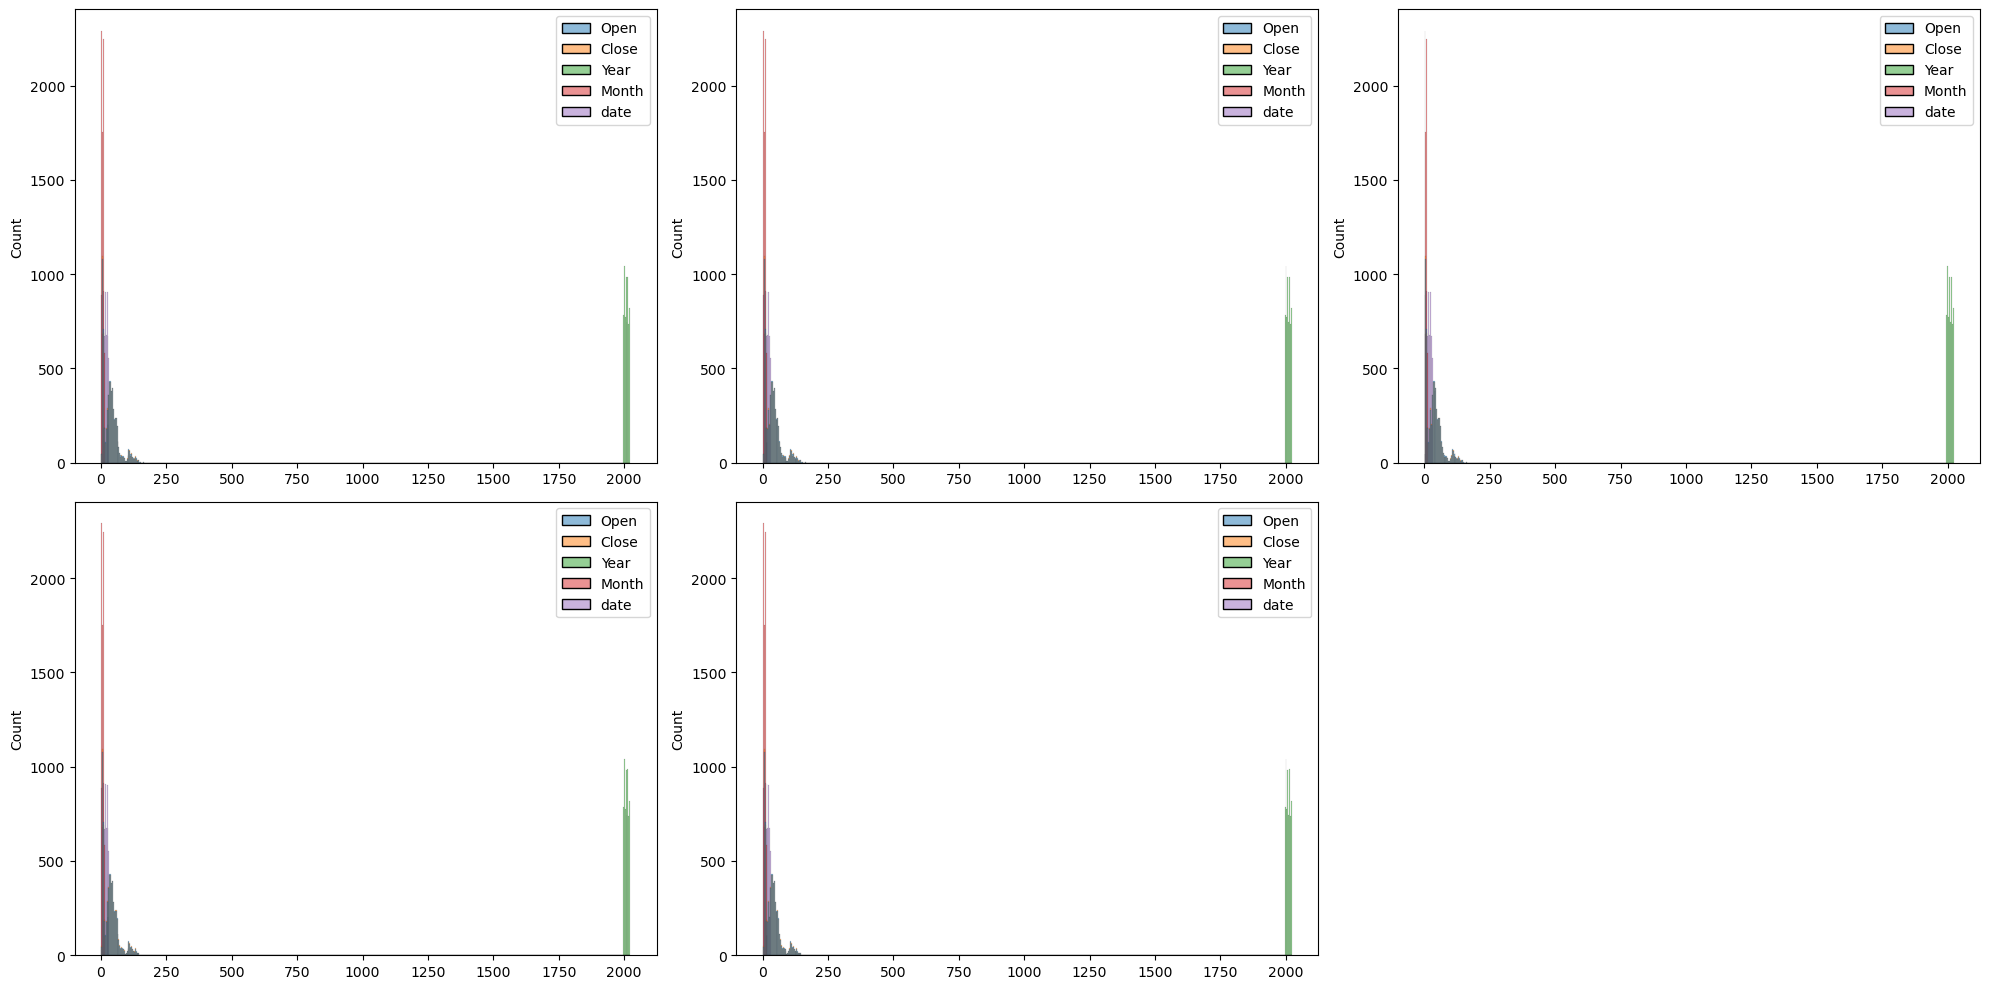

In [38]:
num_var=['Open','Close','Year','Month','date']

#create figures with subplot
fig, axs=plt.subplots(nrows=2,ncols=3,figsize=(20,10))
axs=axs.flatten()

for i,var in enumerate (num_var):
    sns.histplot(data=df,ax=axs[i])
    
fig.delaxes(axs[5])
    
fig.tight_layout()
plt.show()

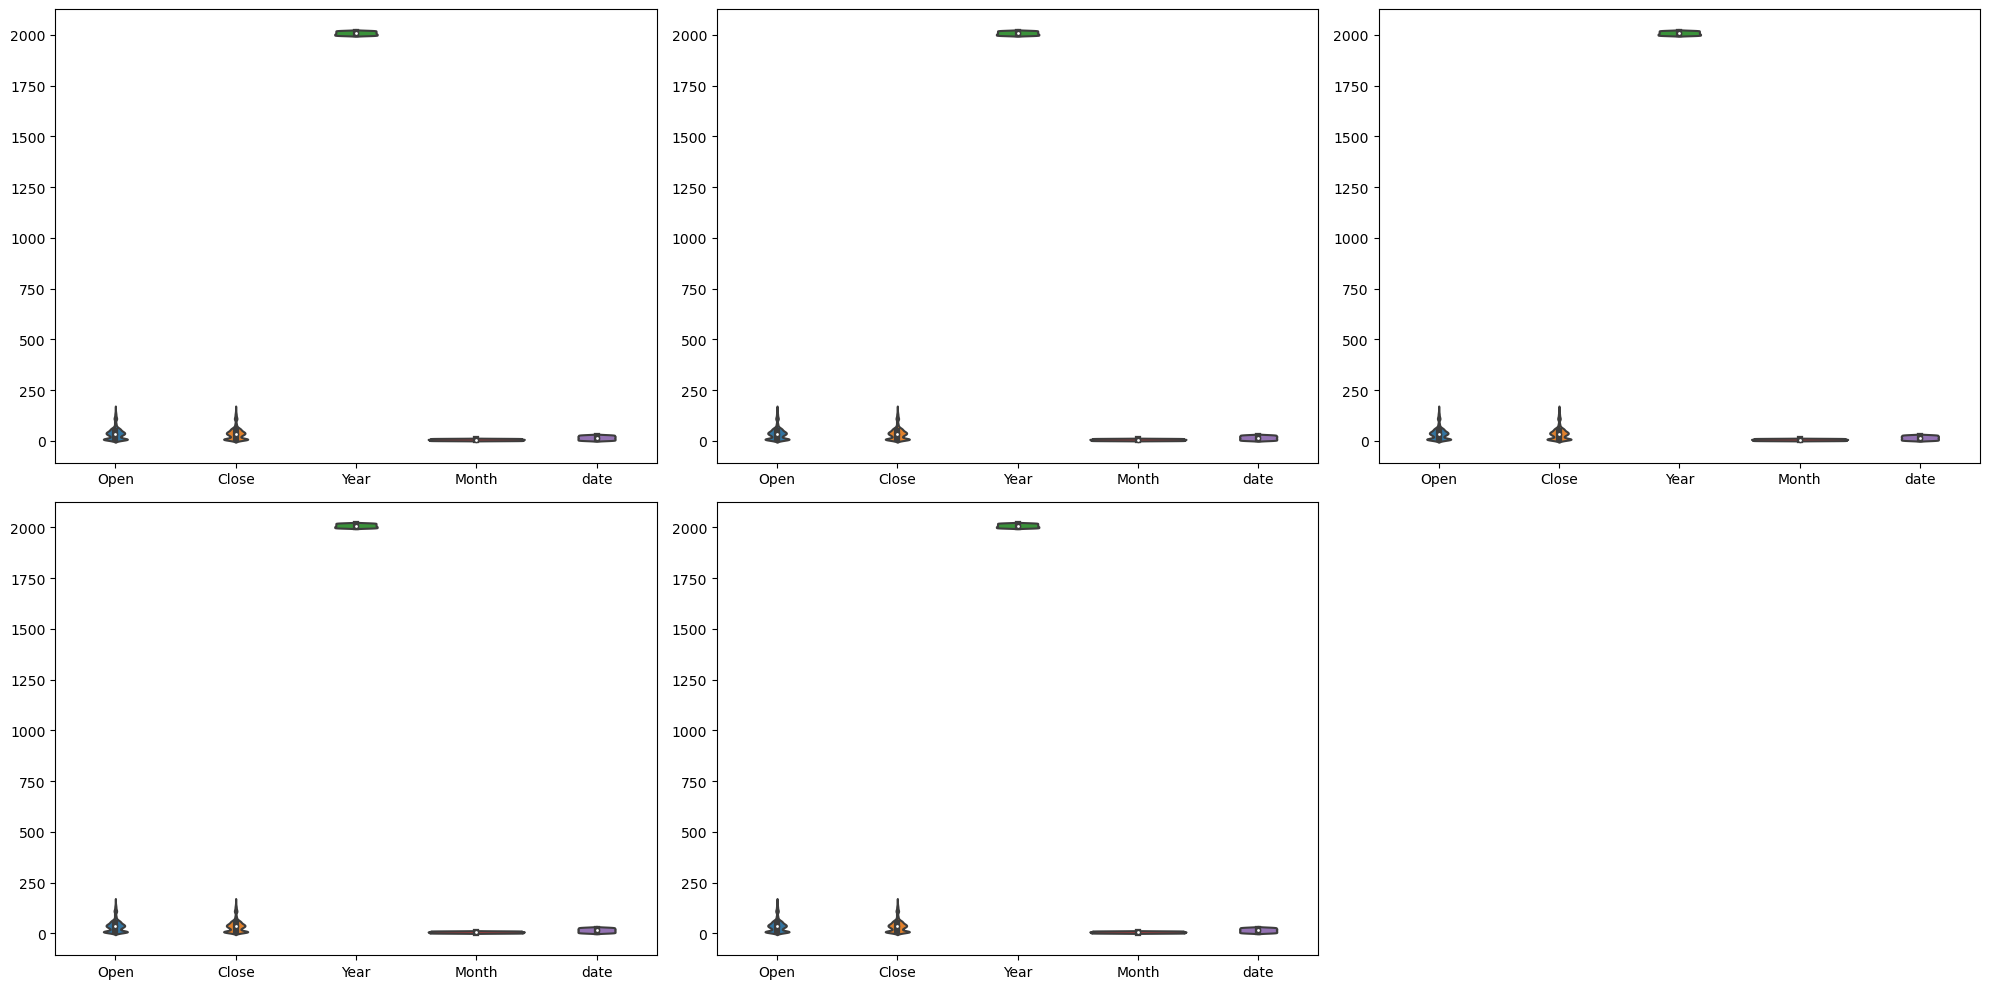

In [39]:
num_var=['Open','Close','Year','Month','date']

#create figures with subplot
fig, axs=plt.subplots(nrows=2,ncols=3,figsize=(20,10))
axs=axs.flatten()

for i,var in enumerate (num_var):
    sns.violinplot(data=df,ax=axs[i])
    
fig.delaxes(axs[5])
    
fig.tight_layout()
plt.show()

In [40]:
df

,Open,Close,Year,Month,date
0,11.172855,11.186892,1996,1,1
1,11.172855,10.979155,1996,1,2
2,10.979155,10.981962,1996,1,3
3,10.807913,10.633863,1996,1,4
4,10.504730,10.423319,1996,1,5
...,...,...,...,...,...
6866,105.550003,107.550003,2023,4,11
6867,108.199997,107.599998,2023,4,12
6868,107.500000,107.500000,2023,4,13
6869,107.599998,107.150002,2023,4,17


In [41]:
x=df.drop('Open',axis=1)
y=df['Open']

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [43]:
x_train

,Close,Year,Month,date
2831,41.439224,2006,12,7
1171,6.790738,2000,6,27
6231,39.869999,2020,9,17
5260,39.862499,2016,10,10
5968,33.805000,2019,8,26
...,...,...,...,...
4931,29.153742,2015,6,10
3264,53.386597,2008,9,5
1653,6.442639,2002,5,2
2607,31.101524,2006,1,12


In [44]:
y_train

2831    41.266579
1171     6.877762
6231    40.195000
5260    39.052673
5968    34.639999
          ...    
4931    29.058468
3264    55.115814
1653     6.302276
2607    31.160477
2732    43.119362
Name: Open, Length: 5496, dtype: float64

In [45]:
x_test

,Close,Year,Month,date
5126,30.220806,2016,3,23
4472,21.231735,2013,7,25
318,10.339102,1997,3,20
3862,57.216599,2011,2,10
287,10.302608,1997,2,5
...,...,...,...,...
3484,45.093025,2009,8,5
1108,6.094540,2000,3,30
5857,52.064999,2019,3,11
3059,82.168770,2007,11,7


In [46]:
y_test

5126    29.706327
4472    21.703341
318     10.184703
3862    57.068924
287     10.675972
          ...    
3484    45.445538
1108     5.850309
5857    51.000000
3059    81.968697
3925    56.497280
Name: Open, Length: 1375, dtype: float64

In [47]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5496, 4), (1375, 4), (5496,), (1375,))

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston

#create a decisiontreeRegressor object
dtree=DecisionTreeRegressor()

#define the hyperparameter to tune and thier values
param_grid={
    'max_depth':[2,4,6,8],
    'min_samples_split':[2,4,6,8],
    'min_samples_leaf':[1,2,3,4],
    'max_features':['auto','sqrt','log2'],
    'random_state':[0,7,42]
}

#create a gridsearchcv object
grid_search=GridSearchCV(dtree,param_grid,cv=5,scoring='neg_mean_squared_error')

#fit the gridsearchcv object to the data
grid_search.fit(x_train,y_train)

#print the best hyperparameter
print(grid_search.best_params_)

{'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 8, 'random_state': 42}


In [49]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor( random_state=42,max_depth=8, max_features= 'auto', min_samples_leaf=2, min_samples_split=8)
dtree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=2,
                      min_samples_split=8, random_state=42)

In [50]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred=dtree.predict(x_test)
mae=mean_absolute_percentage_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)
rmse=math.sqrt(mse)

In [51]:
print(mae)
print(mse)
print(rmse)
print(mse)

0.0208063432076997
1.51687715842493
1.2316156699331695
1.51687715842493


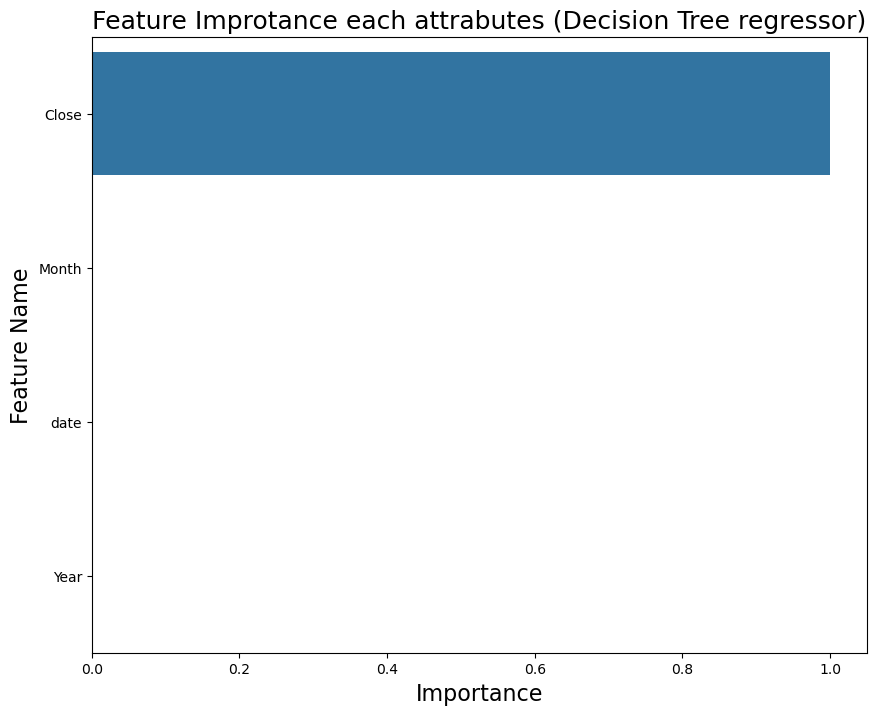

In [52]:
imp_df=pd.DataFrame({
    'Feature Name':x_train.columns,
    'Importance':dtree.feature_importances_
})
fi=imp_df.sort_values(by='Importance',ascending=False)
fi2=fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2,x='Importance',y='Feature Name')
plt.title('Feature Improtance each attrabutes (Decision Tree regressor)',fontsize=18)
plt.xlabel('Importance',fontsize=16)
plt.ylabel('Feature Name',fontsize=16)

plt.show()


In [53]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


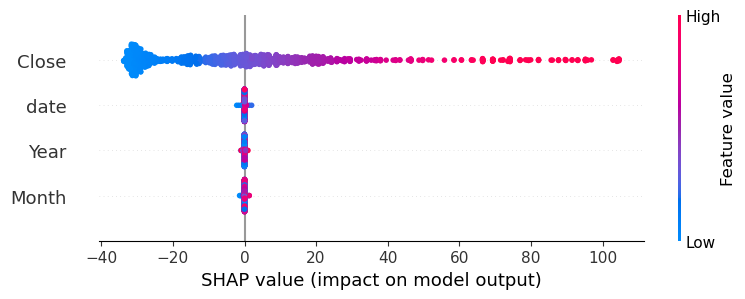

In [54]:
import shap
explainer=shap.TreeExplainer(dtree)
shap_values=explainer.shap_values(x_test)
shap.summary_plot(shap_values,x_test,color='r')

In [55]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(random_state=7,n_estimators=50,learning_rate=1,loss='linear')
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)

In [56]:
from sklearn.metrics import mean_absolute_percentage_error

In [57]:
from sklearn import metrics
import math
y_pred=ada.predict(x_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)
rmse=math.sqrt(mse)

print('MAE is {}',format(mae))
print('MApe is {}',format(mape))
print('MSE is {}',format(mse))
print('RMSE is {}',format(rmse))


MAE is {} 1.5836907251550574
MApe is {} 0.11063541483052843
MSE is {} 4.047456626621346
RMSE is {} 2.0118291743140984


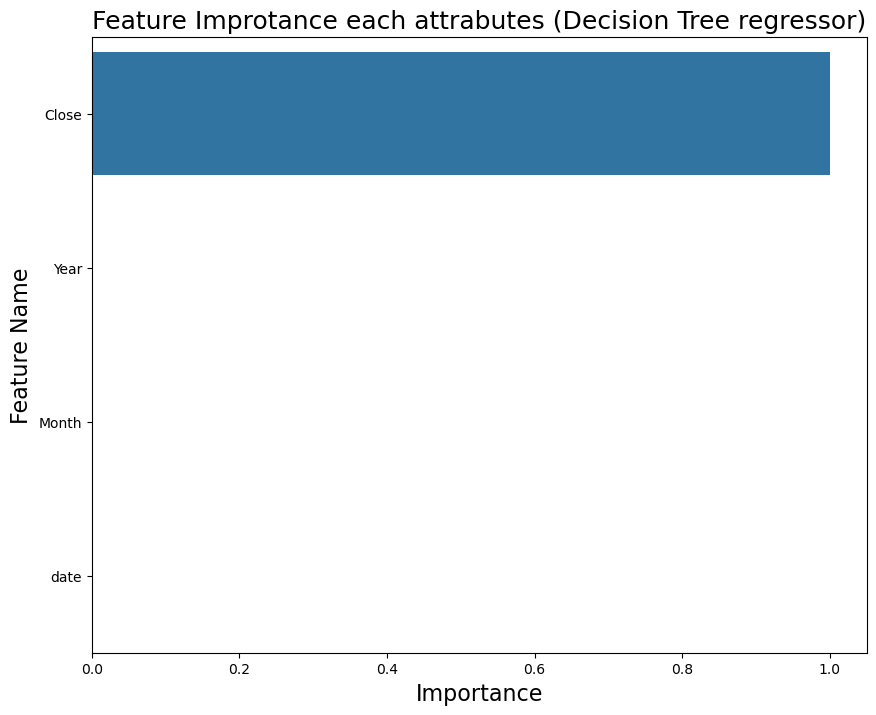

In [58]:
imp_df=pd.DataFrame({    
    'Feature Name':x_train.columns,
    'Importance':ada.feature_importances_
})
fi=imp_df.sort_values(by='Importance',ascending=False)
fi2=fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2,x='Importance',y='Feature Name')
plt.title('Feature Improtance each attrabutes (Decision Tree regressor)',fontsize=18)
plt.xlabel('Importance',fontsize=16)
plt.ylabel('Feature Name',fontsize=16)

plt.show()

In [59]:
# Importing the necessary Libraries

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


#Creating the SVR Model
regressor=SVR(kernel='rbf',C=100, gamma=0.1,epsilon=0.1)

#Fitting the SVR model
regressor.fit(x_train, y_train.ravel())

#Predicting the target values
y_pred=regressor.predict(x_test)

#Evaluating the model performance
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('Mean Squared Error:',mse)


Mean Squared Error: 11.662888752180173


In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#create a randomforest regressor object
rf=RandomForestRegressor()

#define the hyperparameter the grid
param_grid={
     'max_depth':[3,5,7,9],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':['auto','sqrt'],
    'random_state':[0,7,42]
}

#create a gridsearchCV object
grid_search=GridSearchCV(rf,param_grid,cv=5,scoring='r2')

#fit the gridsearchCV object to the training data 
grid_search.fit(x_train,y_train)

#print the best hyperparameter
print("Best hyperparameter:",grid_search.best_params_)

Best hyperparameter: {'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}


In [61]:
rf=RandomForestRegressor( random_state=42,max_depth=7, max_features= 'auto', min_samples_leaf=1, min_samples_split=2)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=7, random_state=42)

In [62]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred=rf.predict(x_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)
rmse=math.sqrt(mse)

print('MAE is {}',format(mae))
print('MApe is {}',format(mape))
print('MSE is {}',format(mse))
print('RMSE is {}',format(rmse))

MAE is {} 0.685403631956627
MApe is {} 0.019493770570239453
MSE is {} 1.2250504977705154
RMSE is {} 1.1068199933912088


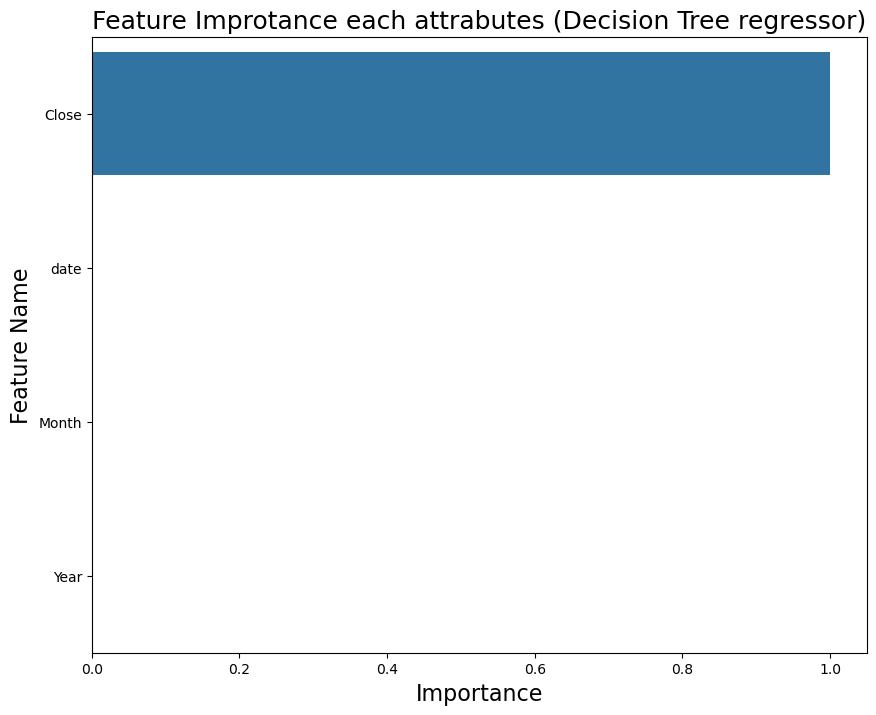

In [63]:
imp_df=pd.DataFrame({
    'Feature Name':x_train.columns,
    'Importance':rf.feature_importances_
})
fi=imp_df.sort_values(by='Importance',ascending=False)
fi2=fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2,x='Importance',y='Feature Name')
plt.title('Feature Improtance each attrabutes (Decision Tree regressor)',fontsize=18)
plt.xlabel('Importance',fontsize=16)
plt.ylabel('Feature Name',fontsize=16)

plt.show()

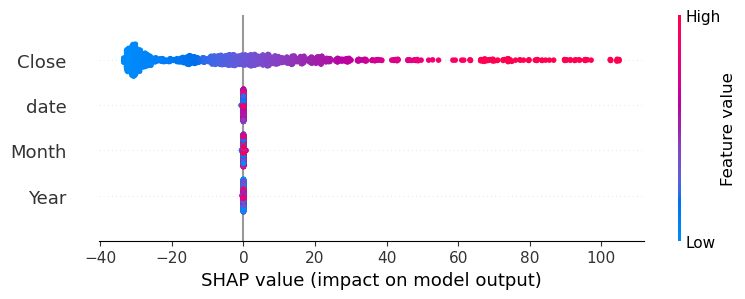

In [64]:
import shap
explainer=shap.TreeExplainer(rf)
shap_values=explainer.shap_values(x_test)
shap.summary_plot(shap_values,x_test)